   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


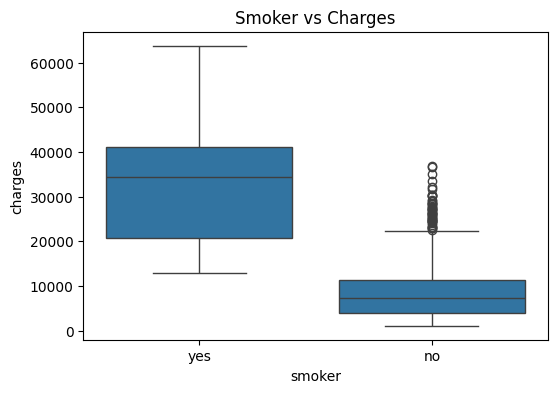

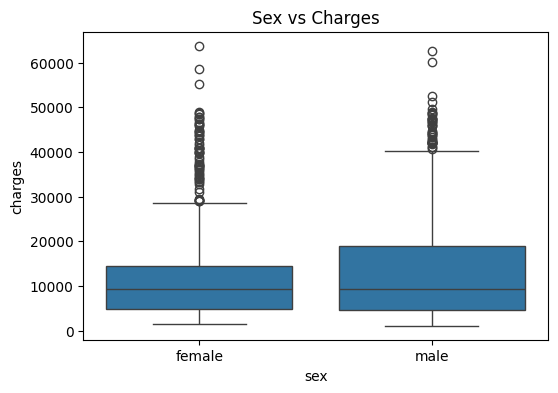

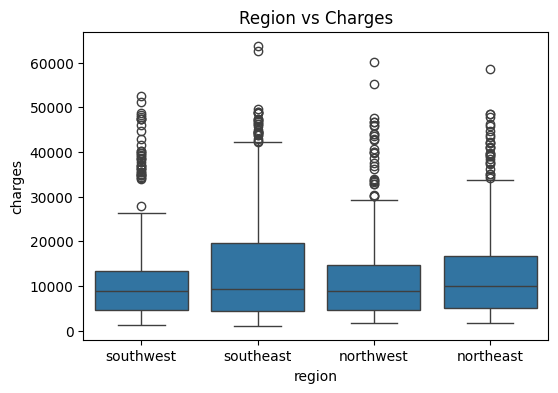

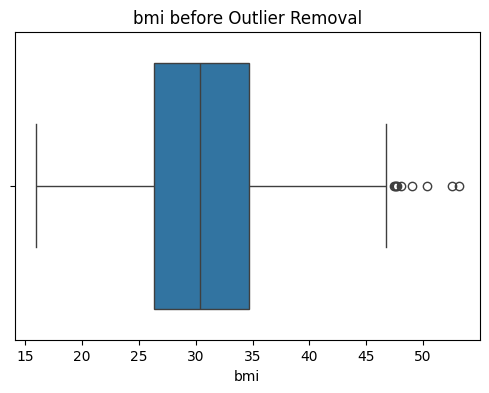

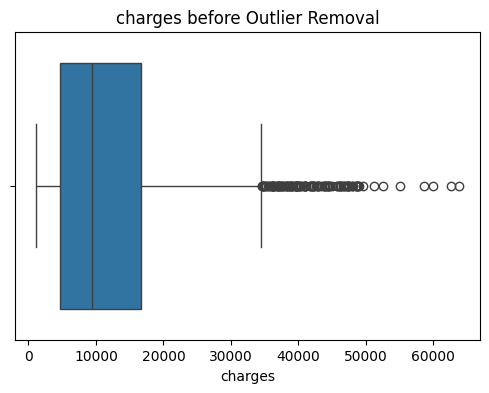

Outliers Removed: 26


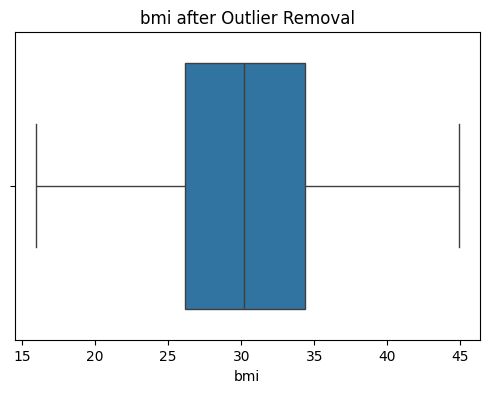

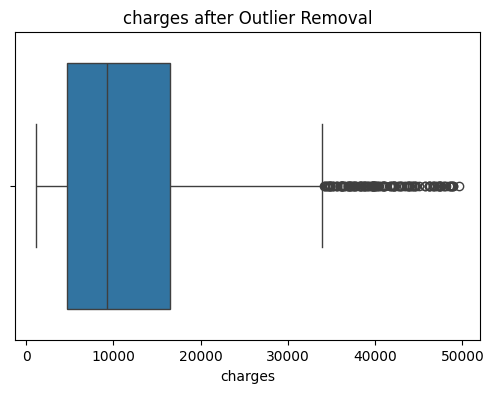

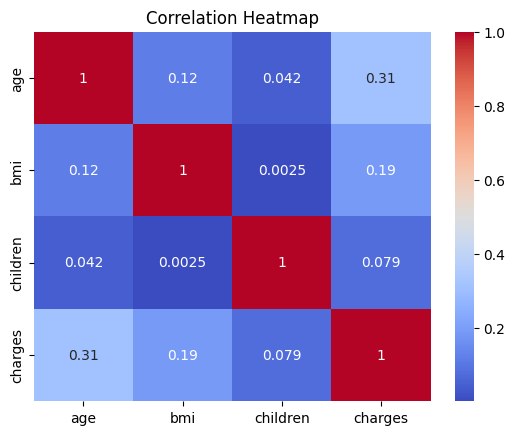

Full Feature Model R²: 0.8338

Important Features:
smoker    0.616033
bmi       0.201200
age       0.138340
dtype: float64

Top 3 Feature Model R²: 0.8110

Outliers Removed: 26
R² (Full Features): 0.8338
R² (Top 3 Features): 0.8110
Top 3 Features: ['smoker', 'bmi', 'age']


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

df = pd.read_csv('insurance.csv')
print(df.head())

plt.figure(figsize=(6, 4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Smoker vs Charges")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="sex", y="charges", data=df)
plt.title("Sex vs Charges")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="region", y="charges", data=df)
plt.title("Region vs Charges")
plt.show()

for col in ['bmi', 'charges']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} before Outlier Removal")
    plt.show()

rows_before = df.shape[0]
df = df[(df['bmi'] <= 45) & (df['charges'] <= 50000)]
rows_after = df.shape[0]
print(f"Outliers Removed: {rows_before - rows_after}")


for col in ['bmi', 'charges']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} after Outlier Removal")
    plt.show()


sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df[col] = le.fit_transform(df[col])


X = df.drop("charges", axis=1)
y = df["charges"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


rf_full = RandomForestRegressor(random_state=42)
rf_full.fit(X_train, y_train)
y_pred_full = rf_full.predict(X_test)
r2_full = r2_score(y_test, y_pred_full)
print(f"Full Feature Model R²: {r2_full:.4f}")


feature_importances = pd.Series(rf_full.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportant Features:")
print(feature_importances.head(3))

top3_features = feature_importances.head(3).index.tolist()
X_top3 = X[top3_features]
X_top3_scaled = scaler.fit_transform(X_top3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X_top3_scaled, y, test_size=0.2, random_state=42)

rf_top3 = RandomForestRegressor(random_state=42)
rf_top3.fit(X3_train, y3_train)
y_pred_top3 = rf_top3.predict(X3_test)
r2_top3 = r2_score(y3_test, y_pred_top3)
print(f"\nTop 3 Feature Model R²: {r2_top3:.4f}")

print(f"\nOutliers Removed: {rows_before - rows_after}")
print(f"R² (Full Features): {r2_full:.4f}")
print(f"R² (Top 3 Features): {r2_top3:.4f}")
print(f"Top 3 Features: {top3_features}")
